#                              **VISUALISATIONS**       

####  OBJECTIVES:
For further insights into merged dataset with the aid of different plots  

#### INPUT:
The merged_dataset.csv is loaded along with Python libraries imported for visualisations e.g Matplotlib.pyplot,plotly.express


#### OUTPUT:
Different visualisations that gives further insights into the datasets and its distribution. The output visualisations: Pie Chart,Scatter Plot, Heatmap, Box Plot, Regression Plot

In [1]:
# import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

In [2]:
#load merged_dataset onto this notebook
df_merged = pd.read_csv('merged_dataset.csv')
df_merged.head()

,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


# PIE CHART BY WHO REGION

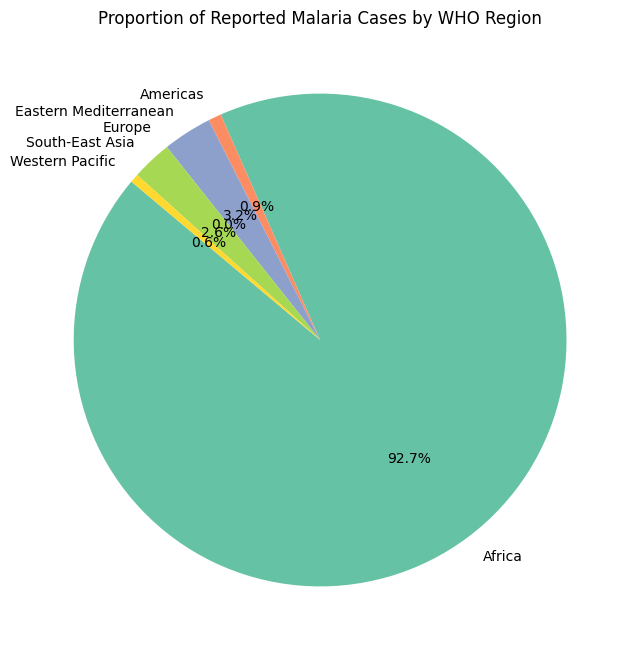

In [3]:
# Pie Chart:Reported Cases by WHO Region# Pie Chart:Reported Cases by WHO Region
region_cases = df_merged.groupby('WHO Region')['Reported Cases'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=140)
plt.title("Proportion of Reported Malaria Cases by WHO Region")
plt.show()


From this it is easy to see the malaria burden on Africa is dominating.

# Scatter Plot; 
to show if there is a visual relationship between the estimated cases and incidence

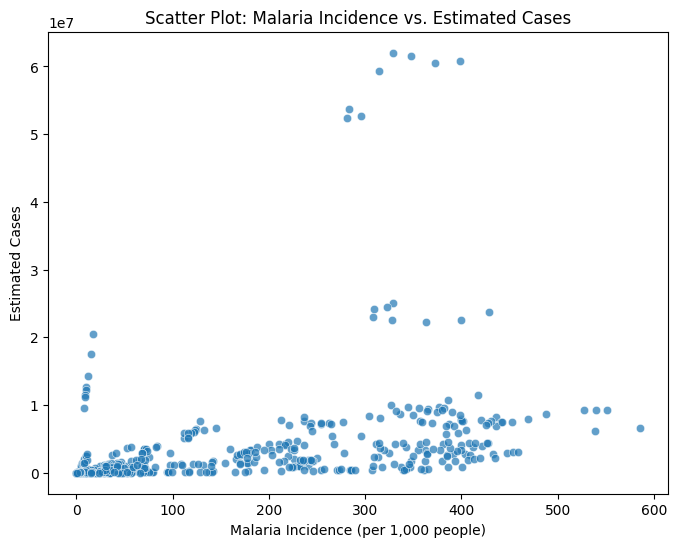

In [4]:
# Scatter Plot: Incidence vs. Estimated Cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Malaria Incidence'], y=df_merged['No. of cases_median'], alpha=0.7)
plt.xlabel("Malaria Incidence (per 1,000 people)")
plt.ylabel("Estimated Cases")
plt.title("Scatter Plot: Malaria Incidence vs. Estimated Cases")
plt.show()

The plot does some relationship between the estimated cases and incident thoughnthere are many scattered points that indicates possible outliers 

# CORRELATION HEATMAP


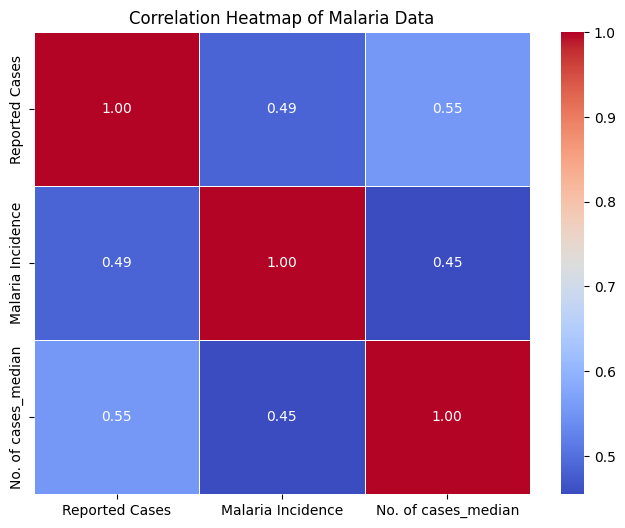

In [5]:
## Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_data = df_merged[['Reported Cases', 'Malaria Incidence', 'No. of cases_median']]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Malaria Data")
plt.show()

The heatmap shows the Reported cases match closely to the No.of cases_median because of the r value is 0.600 which is  a strong correlation

# Box Plot 
using the WHO Region to check for outliers(underreporting)

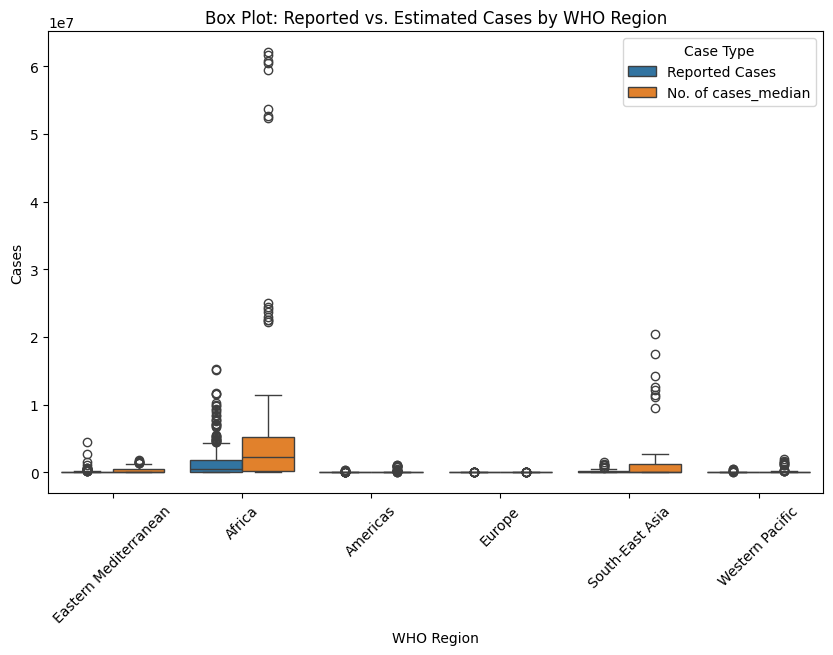

In [6]:
# Box Plot: Reported vs. Estimated Cases by WHO Region ----
plt.figure(figsize=(10, 6))
melted_data = df_merged.melt(id_vars=['WHO Region'], value_vars=['Reported Cases', 'No. of cases_median'],
                             var_name='Case Type', value_name='Cases')
sns.boxplot(x='WHO Region', y='Cases', hue='Case Type', data=melted_data)
plt.xticks(rotation=45)
plt.title("Box Plot: Reported vs. Estimated Cases by WHO Region")
plt.legend(title="Case Type")
plt.show()

This further affirms the hig malaria burden in Africa region, The estimated cases do have outliers suggesting anomalies in the reporting of cases

# REGRESSION PLOT
To see if there is a linear relationship between the two variables Reported and Estimated. It could also be used to predict futre incidence rates

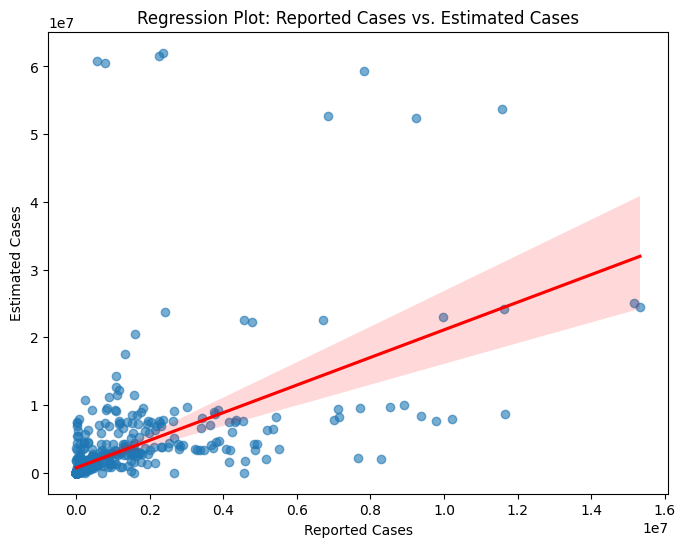

In [7]:
#  Regression Plot: Reported Cases vs. Estimated Cases
plt.figure(figsize=(8, 6))
sns.regplot(x=df_merged['Reported Cases'], y=df_merged['No. of cases_median'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel("Reported Cases")
plt.ylabel("Estimated Cases")
plt.title("Regression Plot: Reported Cases vs. Estimated Cases")
plt.show()

The clustering of the points along both axis indicates strong agreement between the Estimated cases and Reported.While the scattered points indicates a possibility of some discrepancies.